Nama : Angelina Nirmala Puteri Dika Praktiko

NPM  : 24083010055

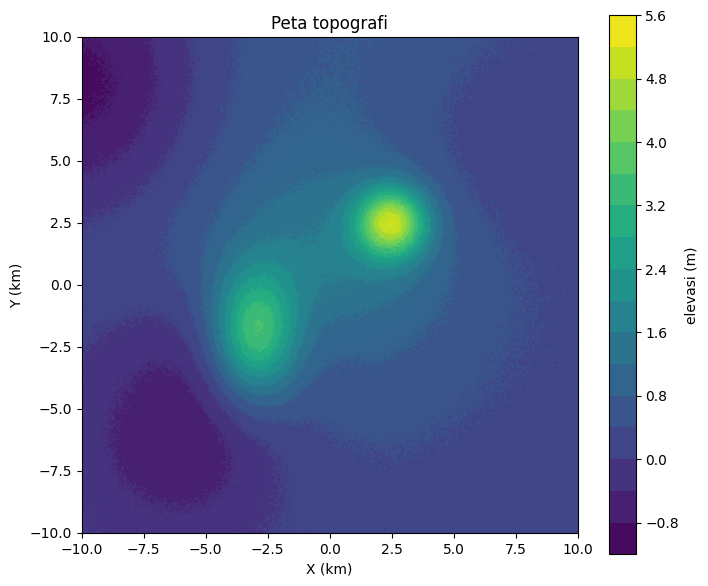

In [34]:
import numpy as np
import matplotlib.pyplot as plt

NPM=55
np.random.seed(NPM)

nx, ny = 400, 400
x = np.linspace(-10, 10, nx)
y = np.linspace(-10, 10, ny)
X, Y = np.meshgrid(x, y)


def peak(x0, y0, sx, sy, amp):
    return amp * np.exp(-(((X - x0)**2) / (2*sx**2) + ((Y - y0)**2) / (2*sy**2)))

Z = peak(-3, -2, 1.2, 1.8, 3.2) + peak(2.5, 2.5, 1.0, 1.0, 4) + peak(0, 0, 3.5, 3.5, 1.2) \
    + peak(6, 6, 4, 4, -0.6)  + peak(-10, 8, 3.5, 3.5, -1.2) +  peak(-6, -6, 3, 3, -1.0) \
    + peak(-2, -2, 4, 2, -0.6)  + peak(2.5, 9.5, 6, 6, 0.75)


Z += 0.5 * np.exp(-(np.sqrt((X/20)**2 + (Y/10)**2)))


Z += 0.05 * np.random.randn(*Z.shape)


fig, ax = plt.subplots(figsize=(8, 7))
levels = 18
cf = ax.contourf(X, Y, Z, levels=levels)
cs = ax.contour(X, Y, Z, levels=levels, linewidths=0.6)
ax.clabel(cs, fmt="%.1f", fontsize=8)
ax.set_title("Peta topografi")
ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")
ax.set_aspect('equal', adjustable='box')
plt.colorbar(cf, ax=ax, label="elevasi (m)")



#1) cari titik tertinggi global  

Titik tertinggi global:
  X = 2.448
  Y = 2.465
  Z = 5.181


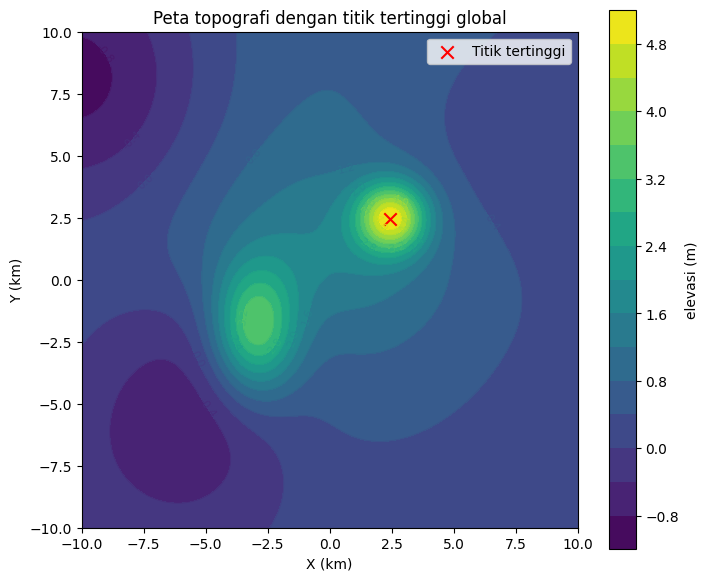

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution

NPM = 55
np.random.seed(NPM)


nx, ny = 400, 400
x = np.linspace(-10, 10, nx)
y = np.linspace(-10, 10, ny)
X, Y = np.meshgrid(x, y)


def peak(x0, y0, sx, sy, amp, X, Y):
    return amp * np.exp(-(((X - x0)**2) / (2*sx**2) + ((Y - y0)**2) / (2*sy**2)))


def topo_func(pos):
    x, y = pos
    Z = (
        peak(-3, -2, 1.2, 1.8, 3.2, x, y)
        + peak(2.5, 2.5, 1.0, 1.0, 4, x, y)
        + peak(0, 0, 3.5, 3.5, 1.2, x, y)
        + peak(6, 6, 4, 4, -0.6, x, y)
        + peak(-10, 8, 3.5, 3.5, -1.2, x, y)
        + peak(-6, -6, 3, 3, -1.0, x, y)
        + peak(-2, -2, 4, 2, -0.6, x, y)
        + peak(2.5, 9.5, 6, 6, 0.75, x, y)
        + 0.5 * np.exp(-(np.sqrt((x/20)**2 + (y/10)**2)))
    )
    return Z


def neg_topo(pos):
    return -topo_func(pos)


bounds = [(-10, 10), (-10, 10)]


result = differential_evolution(neg_topo, bounds, seed=NPM)
x_max, y_max = result.x
z_max = topo_func((x_max, y_max))

print(f"Titik tertinggi global:")
print(f"  X = {x_max:.3f}")
print(f"  Y = {y_max:.3f}")
print(f"  Z = {z_max:.3f}")


Z = (
    peak(-3, -2, 1.2, 1.8, 3.2, X, Y)
    + peak(2.5, 2.5, 1.0, 1.0, 4, X, Y)
    + peak(0, 0, 3.5, 3.5, 1.2, X, Y)
    + peak(6, 6, 4, 4, -0.6, X, Y)
    + peak(-10, 8, 3.5, 3.5, -1.2, X, Y)
    + peak(-6, -6, 3, 3, -1.0, X, Y)
    + peak(-2, -2, 4, 2, -0.6, X, Y)
    + peak(2.5, 9.5, 6, 6, 0.75, X, Y)
    + 0.5 * np.exp(-(np.sqrt((X/20)**2 + (Y/10)**2)))
)

fig, ax = plt.subplots(figsize=(8,7))
levels = 18
cf = ax.contourf(X, Y, Z, levels=levels)
cs = ax.contour(X, Y, Z, levels=levels, linewidths=0.6)
ax.clabel(cs, fmt="%.1f", fontsize=8)
ax.scatter(x_max, y_max, c='red', s=80, marker='x', label='Titik tertinggi')
ax.legend()
ax.set_title("Peta topografi dengan titik tertinggi global")
ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")
ax.set_aspect('equal', adjustable='box')
plt.colorbar(cf, ax=ax, label="elevasi (m)")
plt.show()


Menunjukkan hasil identifikasi titik tertinggi pada permukaan topografi yang merepresentasikan variasi elevasi suatu permukaan tanah dengan beberapa puncak dan lembah. Melalui metode optimasi differential evolution, algoritma secara adaptif mencari koordinat dengan nilai elevasi maksimum di seluruh area, meskipun permukaannya kompleks dan tidak teratur. Titik tertinggi yang ditemukan menunjukkan posisi dominan yang berpotensi menjadi puncak utama daerah tersebut. Dengan tiik tertingginya ada disekitar koordinat X=2.448, Y=2.465

#2) cari titik aliran 'sungai' menuju titik terendah, asumsikan jika 'hujan' langsung mengalir dan tidak terserap ke tanah


=== Titik Awal dan Akhir Aliran Air (Koordinat) ===
Titik 1: Awal (x=0.98, y=5.83) → Akhir (x=1.67, y=6.41)
Titik 2: Awal (x=4.30, y=0.58) → Akhir (x=4.86, y=-0.06)
Titik 3: Awal (x=2.06, y=1.36) → Akhir (x=2.81, y=-1.26)
Titik 4: Awal (x=0.90, y=8.51) → Akhir (x=0.97, y=8.49)
Titik 5: Awal (x=-1.53, y=-8.58) → Akhir (x=-1.40, y=-8.73)
Titik 6: Awal (x=2.92, y=-8.26) → Akhir (x=2.58, y=-8.10)
Titik 7: Awal (x=-1.25, y=-9.60) → Akhir (x=-1.33, y=-9.92)
Titik 8: Awal (x=7.84, y=6.65) → Akhir (x=8.72, y=5.63)
Titik 9: Awal (x=9.27, y=5.56) → Akhir (x=9.93, y=4.78)
Titik 10: Awal (x=-2.33, y=7.40) → Akhir (x=-2.44, y=7.62)


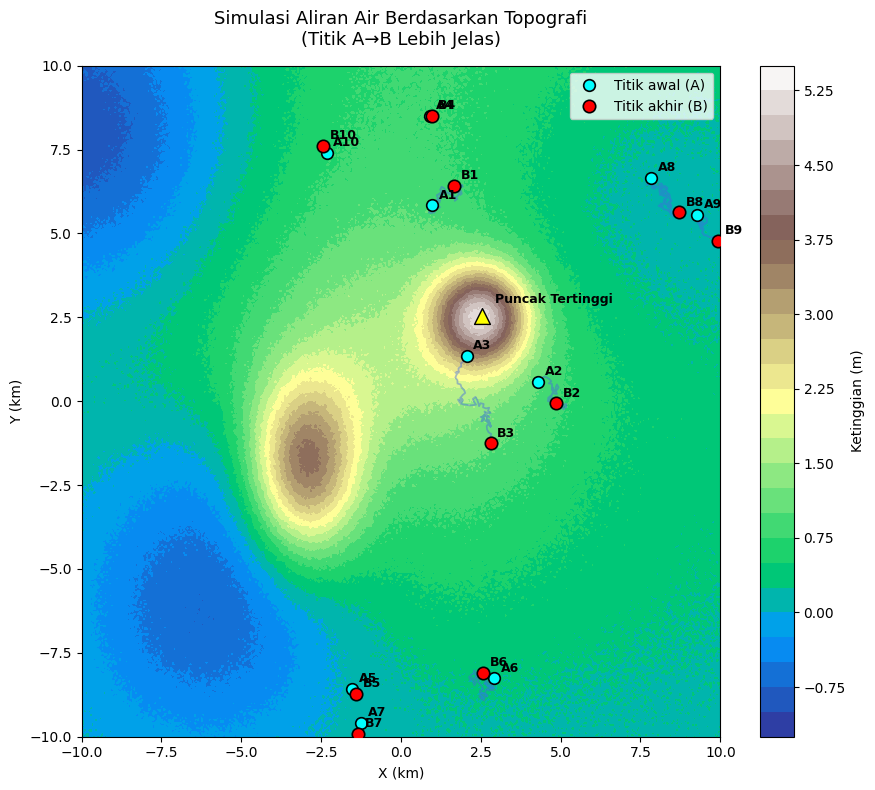

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RectBivariateSpline

# === 1. PETA TOPOGRAFI ===
NPM = 55
np.random.seed(NPM)

nx, ny = 400, 400
x = np.linspace(-10, 10, nx)
y = np.linspace(-10, 10, ny)
X, Y = np.meshgrid(x, y)

def peak(x0, y0, sx, sy, amp):
    return amp * np.exp(-(((X - x0)**2) / (2*sx**2) + ((Y - y0)**2) / (2*sy**2)))

Z = (
    peak(-3, -2, 1.2, 1.8, 3.2)
    + peak(2.5, 2.5, 1.0, 1.0, 4)
    + peak(0, 0, 3.5, 3.5, 1.2)
    + peak(6, 6, 4, 4, -0.6)
    + peak(-10, 8, 3.5, 3.5, -1.2)
    + peak(-6, -6, 3, 3, -1.0)
    + peak(-2, -2, 4, 2, -0.6)
    + peak(2.5, 9.5, 6, 6, 0.75)
)
Z += 0.5 * np.exp(-(np.sqrt((X/20)**2 + (Y/10)**2)))
Z += 0.05 * np.random.randn(*Z.shape)

# === 2. INTERPOLASI UNTUK GRADIENT ===
spline = RectBivariateSpline(x, y, Z.T)

# === 3. TITIK AWAL PARTIKEL AIR ===
np.random.seed(0)
n_particles = 10
start_x = np.random.uniform(-10, 10, n_particles)
start_y = np.random.uniform(-10, 10, n_particles)
positions = np.vstack([start_x, start_y]).T

# === 4. SIMULASI PERGERAKAN AIR ===
trajectories = []
for pos in positions:
    path = [pos]
    for _ in range(100):
        x0, y0 = path[-1]
        dzdx = spline(x0, y0, dx=1, dy=0)[0, 0]
        dzdy = spline(x0, y0, dx=0, dy=1)[0, 0]
        grad = np.array([dzdx, dzdy])
        step = -0.1 * grad / (np.linalg.norm(grad) + 1e-6)
        new_pos = path[-1] + step
        if not (-10 <= new_pos[0] <= 10 and -10 <= new_pos[1] <= 10):
            break
        path.append(new_pos)
    trajectories.append(np.array(path))

# === 5. TITIK AKHIR ===
end_points = np.array([traj[-1] for traj in trajectories])

# === 6. CETAK TITIK ===
print("\n=== Titik Awal dan Akhir Aliran Air (Koordinat) ===")
for i in range(n_particles):
    print(f"Titik {i+1}: Awal (x={start_x[i]:.2f}, y={start_y[i]:.2f}) → Akhir (x={end_points[i,0]:.2f}, y={end_points[i,1]:.2f})")

# === 7. VISUALISASI ===
plt.figure(figsize=(9, 8))
contour = plt.contourf(X, Y, Z, levels=25, cmap='terrain')
plt.colorbar(contour, label='Ketinggian (m)')

# Jalur aliran air
for i, traj in enumerate(trajectories, start=1):
    plt.plot(traj[:, 0], traj[:, 1], color='royalblue', alpha=0.45, linewidth=1.3, zorder=2)
    plt.text(traj[0, 0]+0.2, traj[0, 1]+0.2, f"A{i}", color='black', fontsize=9, weight='bold', zorder=5)
    plt.text(traj[-1, 0]+0.2, traj[-1, 1]+0.2, f"B{i}", color='black', fontsize=9, weight='bold', zorder=5)

# Titik awal dan akhir lebih jelas
plt.scatter(start_x, start_y, color='cyan', s=70, edgecolor='black', linewidth=1.2, zorder=4, label='Titik awal (A)')
plt.scatter(end_points[:,0], end_points[:,1], color='red', s=80, edgecolor='black', linewidth=1.2, zorder=4, label='Titik akhir (B)')

# Titik tertinggi
i_max, j_max = np.unravel_index(np.argmax(Z), Z.shape)
plt.scatter(X[i_max, j_max], Y[i_max, j_max], s=130, color='yellow', edgecolor='black', marker='^', zorder=6)
plt.text(X[i_max, j_max]+0.4, Y[i_max, j_max]+0.4, 'Puncak Tertinggi', color='black', fontsize=9, weight='bold', zorder=7)

plt.title("Simulasi Aliran Air Berdasarkan Topografi\n(Titik A→B Lebih Jelas)", fontsize=13, pad=15)
plt.xlabel("X (km)")
plt.ylabel("Y (km)")
plt.legend()
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.tight_layout()
plt.show()


Dari visualisasi ini terlihat simulasi aliran air pada permukaan topografi yang bervariasi antara dataran rendah (hijau) hingga area tinggi (cokelat). Titik berwarna cyan (A) menunjukkan posisi awal air, sedangkan titik merah (B) menandai titik akhir aliran setelah mengikuti kontur medan menuju daerah yang lebih rendah. Jalur biru menggambarkan arah aliran air dari titik awal ke akhir, memperlihatkan bagaimana air mengalir mengikuti kemiringan topografi. Titik segitiga kuning menandakan puncak tertinggi di wilayah tersebut, yaitu area dengan elevasi maksimum tempat aliran air tidak akan menuju ke atas, melainkan menyebar ke lereng di sekitarnya. Secara keseluruhan, peta ini menunjukkan bagaimana bentuk permukaan memengaruhi arah dan pola aliran air. Dapat juga dilihat dari visualisasi, jika pada awalnya titik 23 itu berada di koordinat  (x=2.06, y=1.36) dan akhirnya menjadi  (x=2.81, y=-1.26), hal ini membuktikan jika aliran airnya mengalir dari puncak tinggi ke rendah

#3) kerawanan erosi ditentukan oleh kecuraman lereng, hitung skor kerawanan di tiap titik


=== Titik Paling Rawan Erosi (tersebar di lereng & puncak) ===
Titik 1: (x=-3.68, y=-4.19) | Elevasi=1.10 | Kemiringan=0.00378 | Erosion=0.61
Titik 2: (x=-3.83, y=-1.58) | Elevasi=2.61 | Kemiringan=0.00392 | Erosion=0.73
Titik 3: (x=-9.95, y=4.19) | Elevasi=-0.39 | Kemiringan=0.00370 | Erosion=0.51
Titik 4: (x=-3.28, y=-3.63) | Elevasi=2.08 | Kemiringan=0.00349 | Erosion=0.64
Titik 5: (x=2.88, y=2.88) | Elevasi=4.53 | Kemiringan=0.00397 | Erosion=0.86
Titik 6: (x=3.33, y=3.38) | Elevasi=2.75 | Kemiringan=0.00473 | Erosion=0.84
Titik 7: (x=7.04, y=-4.29) | Elevasi=0.32 | Kemiringan=0.00331 | Erosion=0.51
Titik 8: (x=3.38, y=2.48) | Elevasi=3.68 | Kemiringan=0.00463 | Erosion=0.89
Titik 9: (x=3.53, y=3.83) | Elevasi=1.77 | Kemiringan=0.00390 | Erosion=0.67


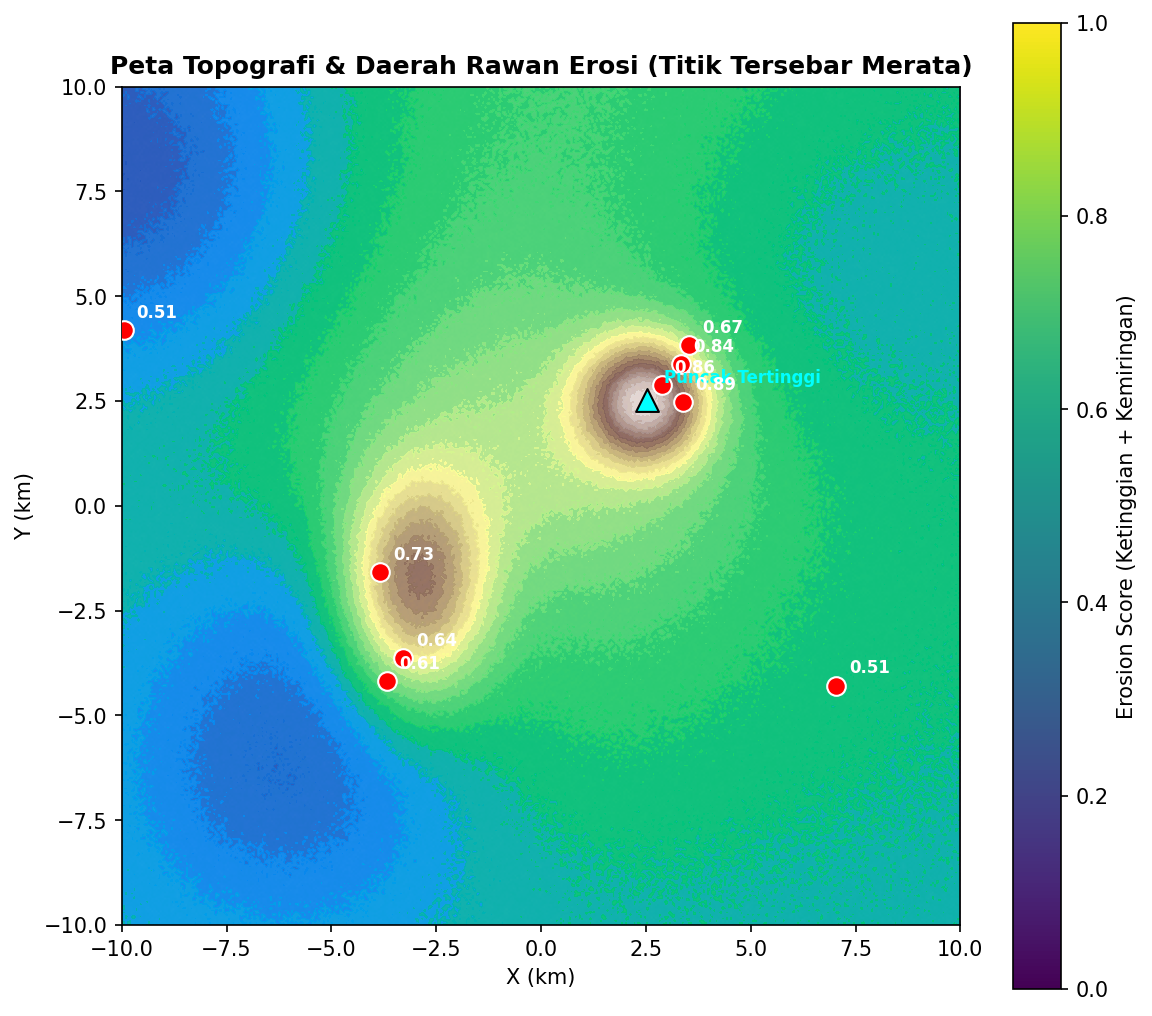

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# === 1. PETA TOPOGRAFI ===
NPM = 55
np.random.seed(NPM)

nx, ny = 400, 400
x = np.linspace(-10, 10, nx)
y = np.linspace(-10, 10, ny)
X, Y = np.meshgrid(x, y)

def peak(x0, y0, sx, sy, amp):
    return amp * np.exp(-(((X - x0)**2) / (2*sx**2) + ((Y - y0)**2) / (2*sy**2)))

Z = (
    peak(-3, -2, 1.2, 1.8, 3.2)
    + peak(2.5, 2.5, 1.0, 1.0, 4)
    + peak(0, 0, 3.5, 3.5, 1.2)
    + peak(6, 6, 4, 4, -0.6)
    + peak(-10, 8, 3.5, 3.5, -1.2)
    + peak(-6, -6, 3, 3, -1.0)
    + peak(-2, -2, 4, 2, -0.6)
    + peak(2.5, 9.5, 6, 6, 0.75)
)
Z += 0.5 * np.exp(-(np.sqrt((X/20)**2 + (Y/10)**2)))
Z += 0.05 * np.random.randn(*Z.shape)

# === 2. HITUNG KEMIRINGAN ===
def turunan_parsial(Z, dx, dy):
    dZdx = np.zeros_like(Z)
    dZdy = np.zeros_like(Z)
    dZdx[:, 1:-1] = (Z[:, 2:] - Z[:, :-2]) / (2 * dx)
    dZdy[1:-1, :] = (Z[2:, :] - Z[:-2, :]) / (2 * dy)
    return dZdx, dZdy

dx = (x[1] - x[0]) * 1000
dy = (y[1] - y[0]) * 1000
dZdx, dZdy = turunan_parsial(Z, dx, dy)
kemiringan = np.sqrt(dZdx**2 + dZdy**2)

# === 3. KOMBINASI KETINGGIAN + KEMIRINGAN ===
Z_norm = (Z - Z.min()) / (Z.max() - Z.min())
kemiringan_norm = (kemiringan - kemiringan.min()) / (kemiringan.max() - kemiringan.min())
erosion_score = 0.6 * kemiringan_norm + 0.4 * Z_norm

# === 4. PILIH TITIK TERSEBAR (pakai grid-block sampling) ===
num_points = 10
grid_size = int(np.sqrt(num_points))

selected_points = []
block_x = np.array_split(np.arange(nx), grid_size)
block_y = np.array_split(np.arange(ny), grid_size)

for bx in block_x:
    for by in block_y:
        subZ = erosion_score[np.ix_(by, bx)]
        if subZ.size == 0:
            continue
        idx = np.unravel_index(np.argmax(subZ), subZ.shape)
        i, j = by[idx[0]], bx[idx[1]]
        selected_points.append((i, j))
        if len(selected_points) >= num_points:
            break
    if len(selected_points) >= num_points:
        break

# === 5. CETAK TITIK ===
print("\n=== Titik Paling Rawan Erosi (tersebar di lereng & puncak) ===")
for idx, (i, j) in enumerate(selected_points, start=1):
    elev = Z[i, j]
    grad = kemiringan[i, j]
    score = erosion_score[i, j]
    print(f"Titik {idx}: (x={X[i, j]:.2f}, y={Y[i, j]:.2f}) | Elevasi={elev:.2f} | Kemiringan={grad:.5f} | Erosion={score:.2f}")

# === 6. VISUALISASI ===
plt.figure(figsize=(8,7), dpi=150)
plt.contourf(X, Y, Z, levels=25, cmap='terrain', alpha=0.9)
plt.imshow(erosion_score.T, origin='lower', extent=[x.min(), x.max(), y.min(), y.max()],
           cmap='inferno', alpha=0.45)

# Titik rawan erosi
for i, j in selected_points:
    plt.scatter(X[i, j], Y[i, j], s=80, edgecolor='white', facecolor='red', zorder=3)
    plt.text(X[i, j]+0.3, Y[i, j]+0.3, f"{erosion_score[i, j]:.2f}",
             color='white', fontsize=8, weight='bold', zorder=4)

# Titik tertinggi
i_max, j_max = np.unravel_index(np.argmax(Z), Z.shape)
plt.scatter(X[i_max, j_max], Y[i_max, j_max], s=120, color='cyan', edgecolor='black', marker='^', zorder=5)
plt.text(X[i_max, j_max]+0.4, Y[i_max, j_max]+0.4, 'Puncak Tertinggi', color='cyan', fontsize=8, weight='bold')

plt.colorbar(label='Erosion Score (Ketinggian + Kemiringan)')
plt.title("Peta Topografi & Daerah Rawan Erosi (Titik Tersebar Merata)", fontsize=12, weight='bold')
plt.xlabel("X (km)")
plt.ylabel("Y (km)")
plt.gca().set_aspect('equal')
plt.tight_layout()
plt.show()


Gambar ini memperlihatkan peta topografi dengan area hijau–cokelat yang menandakan perubahan elevasi dari dataran rendah ke tinggi. Warna cokelat menunjukkan daerah puncak, sedangkan hijau menggambarkan lereng menurun. Titik merah menandai lokasi rawan erosi yang tersebar di sekitar lereng dan sebagian di puncak. Nilai erosion score (0.5–0.8) menunjukkan tingkat kerentanan sedang hingga tinggi, terutama di sekitar daerah curam. Hal ini menggambarkan bahwa kombinasi ketinggian dan kemiringan lereng menjadi faktor utama pemicu potensi erosi.

#4


##a) jika tanah hendak diratakan, berapa banyak volume tanah yang harus dipindahkan? (dipotong dari puncak dan diurug ke lembah)

Ketinggian target rata-rata tanah     : 0.5017 meter
Luas tiap grid cell                    : 2512.55 m²
Volume tanah yang dipotong (cut)       : 1.10e+08 m³
Volume tanah yang diurug (fill)        : 1.10e+08 m³
Volume cut & fill setelah bobot (1.26) : 1.39e+08 m³ dan 1.39e+08 m³


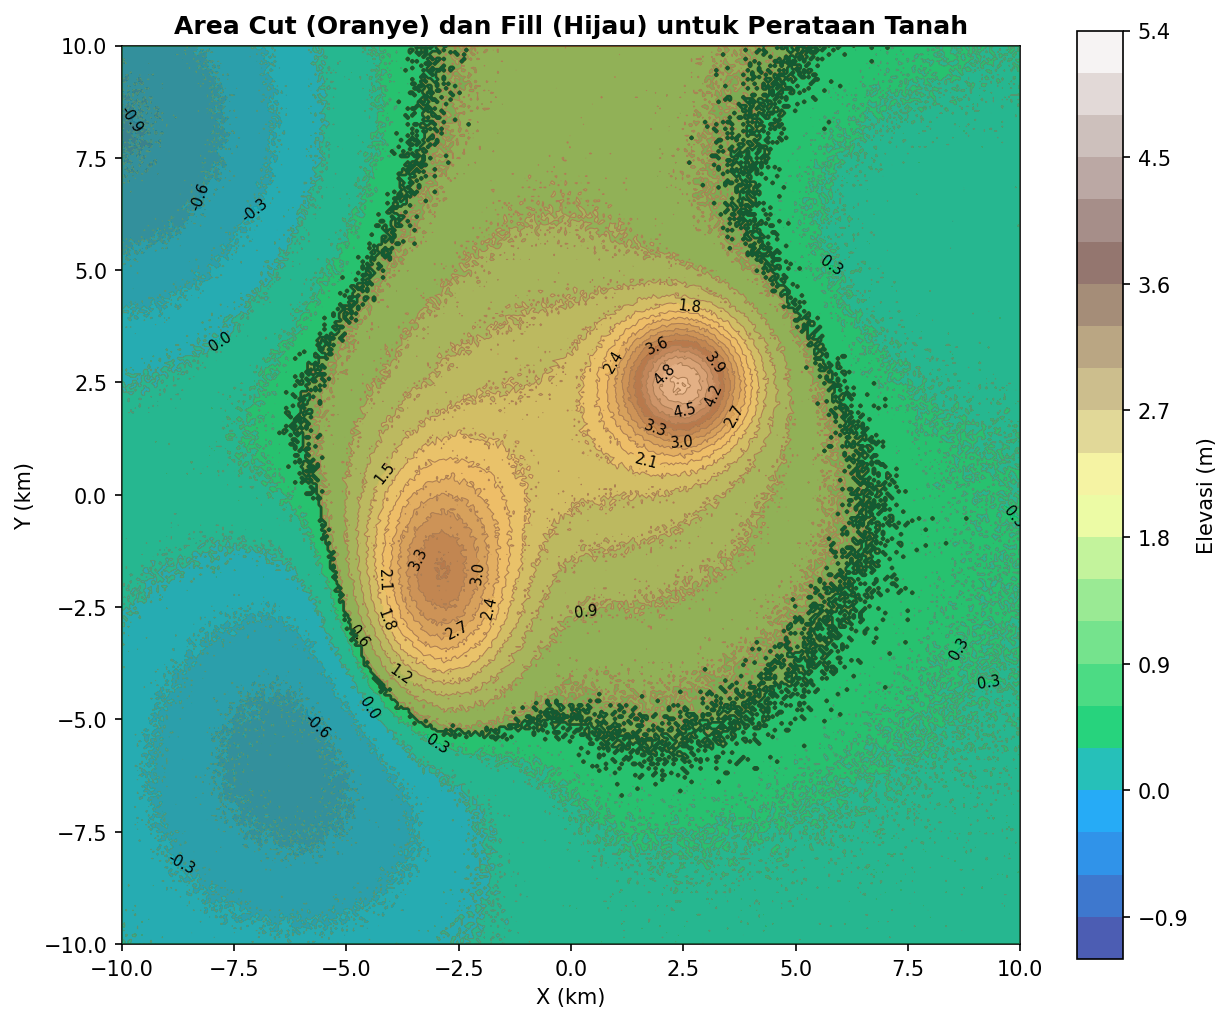

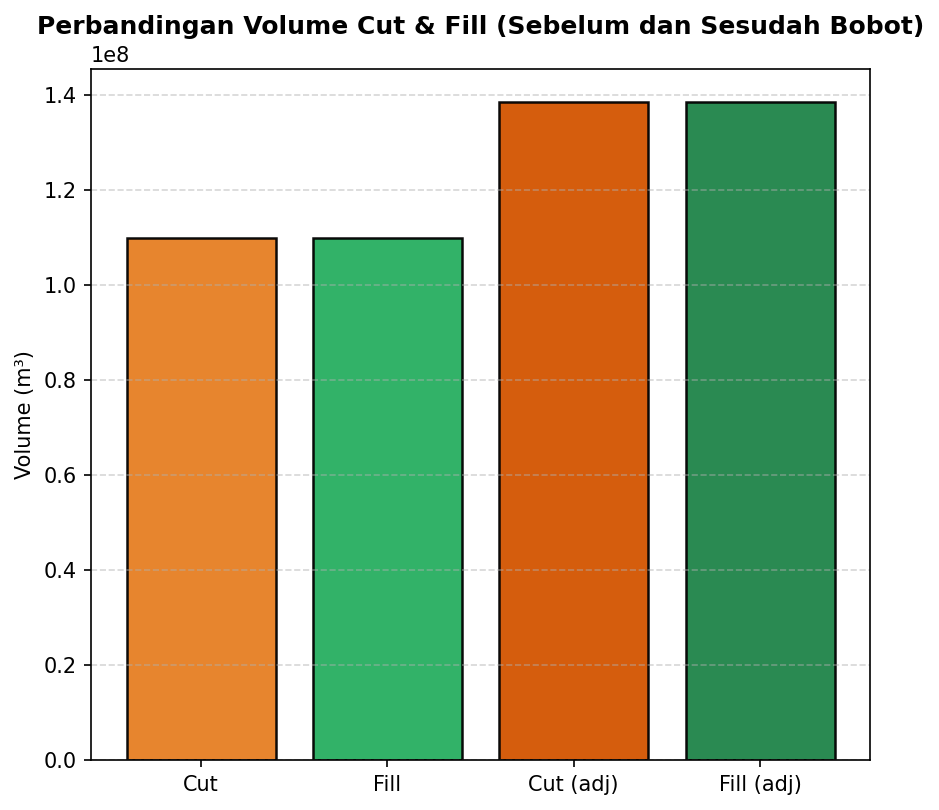

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# === 1. TOPOGRAFI DARI KODE AWAL ===
NPM = 55
np.random.seed(NPM)

nx, ny = 400, 400
x = np.linspace(-10, 10, nx)
y = np.linspace(-10, 10, ny)
X, Y = np.meshgrid(x, y)

def peak(x0, y0, sx, sy, amp):
    return amp * np.exp(-(((X - x0)**2) / (2*sx**2) + ((Y - y0)**2) / (2*sy**2)))

Z = (
    peak(-3, -2, 1.2, 1.8, 3.2)
    + peak(2.5, 2.5, 1.0, 1.0, 4)
    + peak(0, 0, 3.5, 3.5, 1.2)
    + peak(6, 6, 4, 4, -0.6)
    + peak(-10, 8, 3.5, 3.5, -1.2)
    + peak(-6, -6, 3, 3, -1.0)
    + peak(-2, -2, 4, 2, -0.6)
    + peak(2.5, 9.5, 6, 6, 0.75)
)

Z += 0.5 * np.exp(-(np.sqrt((X/20)**2 + (Y/10)**2)))
Z += 0.05 * np.random.randn(*Z.shape)

# === 2. PERHITUNGAN CUT & FILL ===

# Ketinggian target rata-rata
h_target = Z.mean()

# Hitung ukuran tiap grid cell (ubah ke meter)
dx = (x[1] - x[0]) * 1000
dy = (y[1] - y[0]) * 1000
cell_area = dx * dy

# Volume cut & fill (m³)
cut_volume = np.sum((Z - h_target)[Z > h_target]) * cell_area
fill_volume = np.sum((h_target - Z)[Z < h_target]) * cell_area

# Koreksi bobot (misal faktor kompaksi & efisiensi alat)
bobot = 1.20 * 1.05  # total 1.26
cut_adjusted = cut_volume * bobot
fill_adjusted = fill_volume * bobot

# === 3. CETAK HASIL ===
print(f"Ketinggian target rata-rata tanah     : {h_target:.4f} meter")
print(f"Luas tiap grid cell                    : {cell_area:.2f} m²")
print(f"Volume tanah yang dipotong (cut)       : {cut_volume:.2e} m³")
print(f"Volume tanah yang diurug (fill)        : {fill_volume:.2e} m³")
print(f"Volume cut & fill setelah bobot (1.26) : {cut_adjusted:.2e} m³ dan {fill_adjusted:.2e} m³")

# === 4. VISUALISASI CUT & FILL AREA ===
fig, ax = plt.subplots(figsize=(8.5, 7), dpi=150)
levels = 20
cf = ax.contourf(X, Y, Z, levels=levels, cmap='terrain', alpha=0.85)
cs = ax.contour(X, Y, Z, levels=levels, colors='gray', linewidths=0.5)
ax.clabel(cs, fmt="%.1f", fontsize=7, colors='black')

# Area Cut (lebih tinggi dari rata-rata)
ax.contourf(X, Y, Z > h_target, levels=[0.5, 1],
             colors=['#E67E22'], alpha=0.45, zorder=3)
ax.contour(X, Y, Z > h_target, levels=[0.5], colors='#A04000', linewidths=1.2, zorder=4)

# Area Fill (lebih rendah dari rata-rata)
ax.contourf(X, Y, Z < h_target, levels=[0.5, 1],
             colors=['#27AE60'], alpha=0.45, zorder=3)
ax.contour(X, Y, Z < h_target, levels=[0.5], colors='#145A32', linewidths=1.2, zorder=4)

plt.colorbar(cf, ax=ax, label="Elevasi (m)")
ax.set_title("Area Cut (Oranye) dan Fill (Hijau) untuk Perataan Tanah", fontsize=12, fontweight='bold')
ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")
ax.set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()

# === 5. VISUALISASI PERBANDINGAN CUT & FILL ===
plt.figure(figsize=(6, 5.5), dpi=150)
bars = ['Cut', 'Fill', 'Cut (adj)', 'Fill (adj)']
values = [cut_volume, fill_volume, cut_adjusted, fill_adjusted]
colors = ['#E67E22', '#27AE60', '#D35400', '#1E8449']

plt.bar(bars, values, color=colors, edgecolor='black', linewidth=1.2, alpha=0.95)
plt.ylabel("Volume (m³)")
plt.title("Perbandingan Volume Cut & Fill (Sebelum dan Sesudah Bobot)", fontsize=12, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Menggambarkan analisis volume tanah yang perlu dipindahkan agar permukaan lahan menjadi rata pada ketinggian rata-rata tertentu. Nilai elevasi rata-rata dijadikan sebagai tinggi target perataan, dan dihitungg berapa banyak tanah yang harus dipotong (cut) dari area yang lebih tinggi dan diurug (fill) ke area yang lebih rendah. Visualisasi memperlihatkan zona oranye sebagai wilayah yang perlu dipotong dan zona hijau sebagai area yang perlu diisi.

##b) berapa ketinggian akhir tanah yang rata tersebut?

Ketinggian akhir tanah setelah diratakan: 0.5017 meter (rata-rata elevasi area)


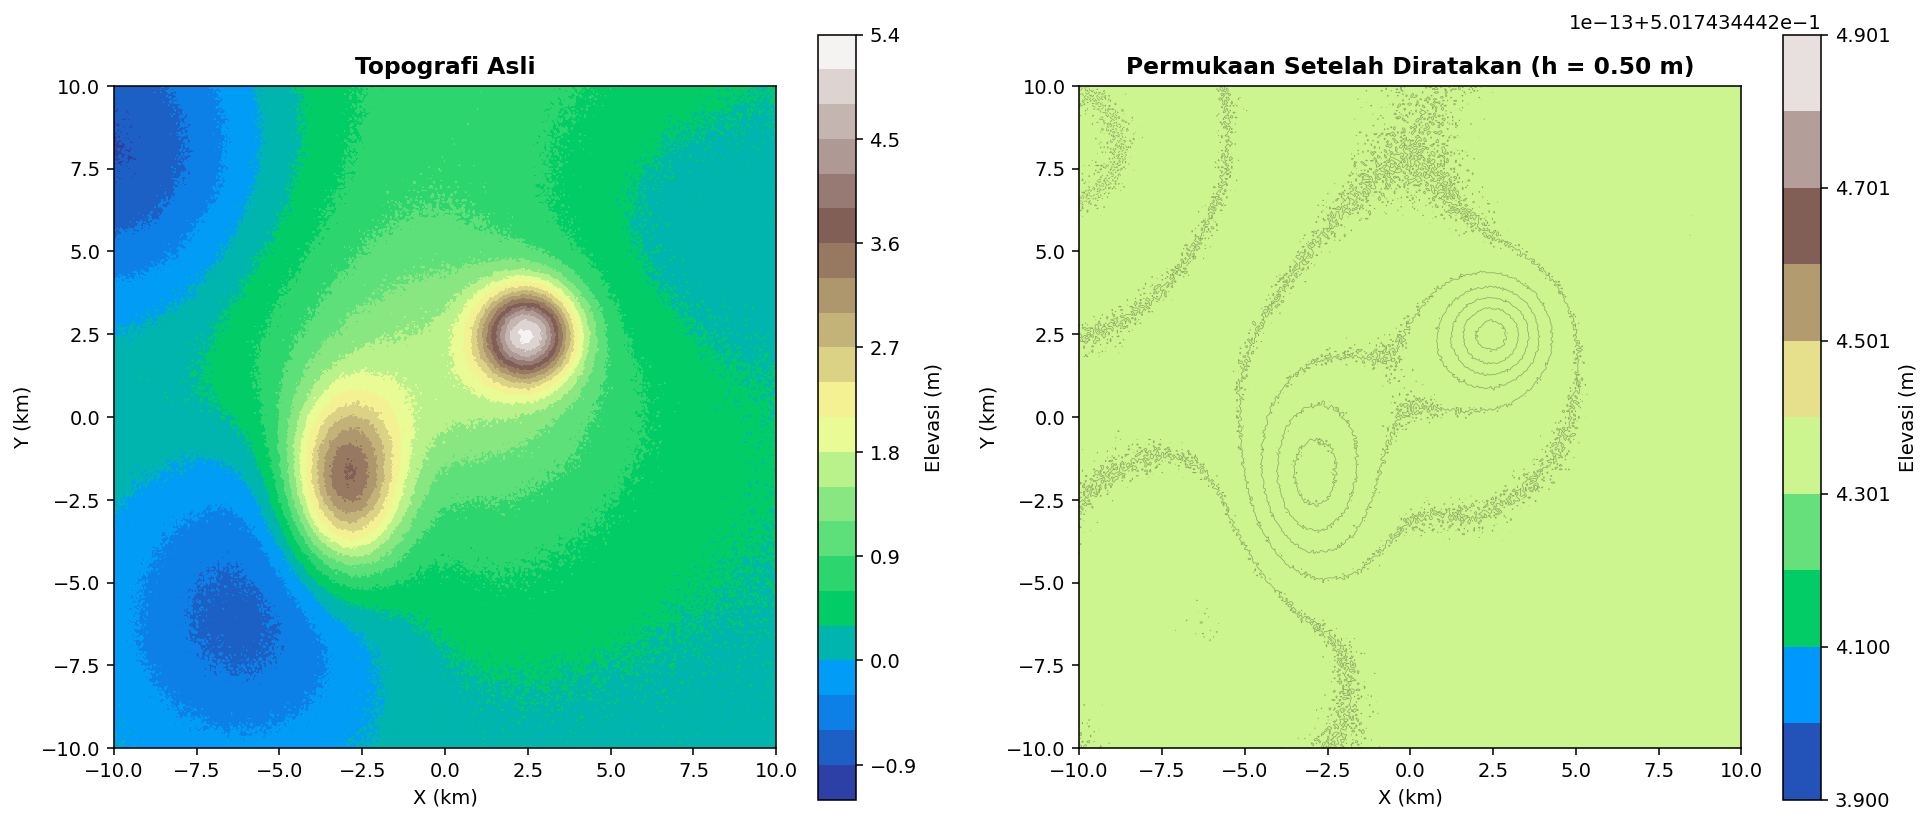

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# === Gunakan topografi sebelumnya ===
# (Pastikan x, y, X, Y, dan Z sudah didefinisikan dari kode topografi awalmu)

# === Hitung elevasi rata-rata ===
h_rata = Z.mean()

print(f"Ketinggian akhir tanah setelah diratakan: {h_rata:.4f} meter (rata-rata elevasi area)")

# === Permukaan datar setelah perataan ===
Z_flat = np.full_like(Z, h_rata)

# === Plot topografi asli vs hasil perataan ===
fig, ax = plt.subplots(1, 2, figsize=(14, 6), dpi=140)

# --- Peta topografi asli ---
cf1 = ax[0].contourf(X, Y, Z, levels=20, cmap='terrain')
ax[0].set_title("Topografi Asli", fontsize=12, fontweight='bold')
ax[0].set_xlabel("X (km)")
ax[0].set_ylabel("Y (km)")
ax[0].set_aspect('equal')
plt.colorbar(cf1, ax=ax[0], label="Elevasi (m)")

# --- Peta permukaan setelah diratakan ---
cf2 = ax[1].contourf(X, Y, Z_flat, levels=10, cmap='terrain')
ax[1].contour(X, Y, Z, colors='k', linewidths=0.4, alpha=0.3)
ax[1].set_title(f"Permukaan Setelah Diratakan (h = {h_rata:.2f} m)", fontsize=12, fontweight='bold')
ax[1].set_xlabel("X (km)")
ax[1].set_ylabel("Y (km)")
ax[1].set_aspect('equal')
plt.colorbar(cf2, ax=ax[1], label="Elevasi (m)")

plt.tight_layout()
plt.show()


Menunjukkan hasil perataan tanah  setelah proses pemotongan dan pengurugan dilakukan untuk mencapai ketinggian rata-rata dri seluruh area. Visualisasi sisi kiri menampilkan kondisi topografi asli, sedangkan sisi kanan memperlihatkan permukaan lahan setelah diratakan, di mana seluruh area telah disetarakan pada tinggi yang sama.